#**Instructions:**#
*For the following problem, you need to write down detailed, step-by-step derivations, and implement an algorithm to find the solution. You must submit a link to your
Colab page to receive full credit. You are encouraged to collaborate and discuss the assignment, but
you **HAVE** to write your submission by yourself. Identical submissions will be regarded as plagiarism.* \\
**Deadline: October 23 11:59pm**

#**Projection onto ellipsoid**# 
For an arbitrary point (vector) $\mathbf{y} \in \mathbb{R}^N$, we consider the following problem of projecting it onto an ellipsoid (i.e., finding point/points in a set that is/are closest to $\mathbf{y}$)
\begin{align*}
\underset{\mathbf{x}}{\text{minimize}} & \quad \frac{1}{2}\| \mathbf{x}- \mathbf{y} \|_2^2 \\
\text{s.t.} & \quad (\mathbf{x}-\boldsymbol{\mu})^T \mathbf{F} (\mathbf{x}-\boldsymbol{\mu}) \leq 1,
\end{align*} 
where $\mathbf{F}$ is a positive semidefinite matrix. We assume that $(\mathbf{y}-\boldsymbol{\mu})^T \mathbf{F} (\mathbf{y}-\boldsymbol{\mu}) > 1$, i.e., $\mathbf{y}$ is outside the ellipsoid region. Otherwise the problem is trivial. \\


a) For the special case of $\boldsymbol{\mu} = \mathbf{0}$ and $\mathbf{F} = \mathbf{I}$, we are simply projecting onto a circle. In this case, it's easy to see that the solution should be $\mathbf{x} = \frac{\mathbf{y}}{\| \mathbf{y} \|_2}$. Prove it using KKT conditions. \\






**Add your derivation here**





b) For the generic case when $\mathbf{F} \neq \mathbf{I}$, the solution does not have closed-form. Derive and implement an algorithm to find the solution. Apply your algorithm to the data provided in **proje.npz**. (it contains $\mathbf{y},\mathbf{F},\boldsymbol{\mu}$) to find $\mathbf{x}$, and submit your numerical solution (print out the value of $\mathbf{x}$ that you get). \\

**Hint**: You will need to use the KKT conditions first and then an iterative algorithm. The algorithm is **briefly** mentioned in class; you will find it somewhere on the lecture slides. \\
Depending on whether you picked the best method (multiple methods are applicable), you may or may not need the identities listed at [link](https://en.wikipedia.org/wiki/Matrix_calculus). 


**SEE PDF AT END** 

In [0]:
import timeit
import time
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
import math

from google.colab import drive 
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
with np.load('drive/My Drive/proje.npz') as data:
    y = data['y']
    mu = data['mu']
    F = data['F']

5.301093797000256
2.0521953879049204
1.1540362970818903
0.4844707716345289
0.17804322862717537
0.04186893847438178
0.004746452245042221
0.00014410301602141296
5.131442972761135e-07
5.569611438716038e-11
0.0
convergence


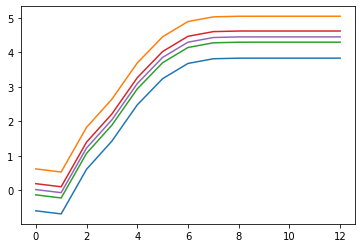

[3.83264212 5.04654726 4.29474166 4.61881546 4.44829262]


In [0]:
def objective(lamb, mu, F, y):
  return np.dot(np.dot(np.transpose((np.subtract(y,mu))/(1+2*np.dot(np.transpose(lamb), F))), F), (np.subtract(y,mu))/(1+2*np.dot(np.transpose(lamb), F)))-1

#Not needed
def gradient(lamb, mu, F, y):
  return np.dot(np.subtract(y,mu)/(1+2*np.dot(np.transpose(lamb), F)), np.dot(np.log(1+2*np.dot(np.transpose(lamb), F)), np.subtract(y,mu)))

def secant(f,fp,mu,F,y,xinit, xinit2,maxit,tol):
  count = 1
  xList = []
  gradList = []
  xList.append(xinit2)
  xList.append(xinit)
  stop = False
  while not stop:
    value = f(xList[count], mu, F, y)

    change = np.dot(value, np.dot((xList[count]-xList[count-1]), 1/(value-f(xList[count-1], mu, F, y))))
    
    update = np.subtract(xList[count], change)
    xList.append(update)
    count+=1
    print(value)
    if count >= maxit:
      print("maxit")
      break
    elif abs((f(xList[count], mu, F, y)-value)/(value+1.0e-10)) < tol:
      print("convergence")
      break

  return xList[count], xList, count
def proj_ellipsoid(y,mu,F):
  """
  Project the point y onto the ellipsoid defined by mean mu and cov F
  """
  lamb = mu+0.01
  x2 = mu+0.1
  maxit = 100
  tol = 1e-15
  ss_init = 1

  ans, xList, count = secant(objective, gradient, mu, F, y, lamb, x2, maxit, tol)

  plt.plot(range(0,count+1), np.squeeze(xList))

  plt.show()
  return ans

ans = proj_ellipsoid(y, mu, F)
print(ans)

In [0]:
x = np.subtract(y,mu)/(1+2*np.dot(np.transpose(ans), F))+mu
print("x: " + str(x))
print(np.dot(np.dot(np.transpose(x-mu),F),x-mu))

x: [ 1.24649578 -0.16111143 -0.65465597 -0.84049671  0.76799941]
1.0000000000000002


#https://colab.research.google.com/drive/1MjZoe9KEtiVi2oalDcivf610zZXuGxv2